# Data preprocessing


In [318]:
#Loading data
import pandas as pd

data=pd.read_csv("kc_house_data.csv")

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Separating data into xand y. Our aim is to predict the price, therefore `price` will be on the y axis.

In [320]:

#x=data.drop('price',axis=1)
#Creating the x_axis
x=data

### Spliting the data

In [321]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

## Preprocessing the train data

Selecting columns that are relevant to carry out analysis

In [322]:
irrelevant_columns=[
  'id',
  'lat',
  'long',
  'date'
]
x=x.drop(irrelevant_columns, axis=1)
x.reset_index(inplace=True)
x.drop(['index'],inplace=True,axis=1)
x


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,1410,1287


### Handling missing values

In [323]:
x.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [324]:
x['waterfront'].unique()

array([nan,  0.,  1.])

We have NaNs in `waterfront`, `view` and `yr_renovated`

#### Waterfront

A home could either have a waterfront or not. Looking at the data, a waterfront conatins either a 1 or a 0 The NaN values should therefore be treated as a category of houses without a waterfront. We will replace the NaN values with a 0. We will also change the datatype from a float to an integer as a house cannot conatin 1.1 waterfronts. It can only be an integer value.

In [325]:
x['waterfront']=x['waterfront'].fillna(0.0)
x['waterfront']=x['waterfront'].astype(int)
x['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

#### Year Renovated

In [326]:
x['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

Some houses have been renovated while others have not. Those that have been renovated have been assigned a value of 0.0. We will therefore fill the null values with 0.0 and change the data type to an integer.

In [327]:
x['yr_renovated']=x['yr_renovated'].fillna(0)
x['yr_renovated']=x['yr_renovated'].astype(int)


x['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1992, 2013, 1994, 1978, 2005, 2003, 1984,
       1954, 2014, 2011, 1983, 1945, 1990, 1988, 1977, 1981, 1995, 2000,
       1999, 1998, 1970, 1989, 2004, 1986, 2007, 1987, 2006, 1985, 2001,
       1980, 1971, 1979, 1997, 1950, 1969, 1948, 2009, 2015, 1974, 2008,
       1968, 2012, 1963, 1951, 1962, 1953, 1993, 1996, 1955, 1982, 1956,
       1940, 1976, 1946, 1975, 1964, 1973, 1957, 1959, 1960, 1967, 1965,
       1934, 1972, 1944, 1958])

#### View


In [328]:
x['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

The view column represents how good the view was from a scale of 0 to 4. We will fill the `NaN` values of `view` with the median view index for modelling.

In [329]:
#Using median to fill in the missing values
x['view']=x['view'].fillna(x['view'].median())


In [330]:
#Checking to see if there are still missing values 
x.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Checking for duplicates

In [331]:
x.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool

No duplictaes in the training dataset

### Feature engineering

In [332]:
#Creting a column called age_of_house 
x['age_of_house']=2015-x['yr_built']
#Creting a column called time since renovation
x['time_since_renovation']=2015-x['yr_renovated']
x['time_since_renovation']=x['time_since_renovation'].replace(to_replace=2015, value=0)
#Dropping the columns we had before 
x=x.drop(['yr_built','yr_renovated'],axis=1)


### Checking for Multicollinearity of variables

In [333]:
#The correlation matrix
x.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,age_of_house,time_since_renovation
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,-0.053402,0.585241,0.082845,-0.053953,0.064950
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,-0.154092,0.393406,0.030690,-0.155670,-0.007815
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,-0.204786,0.569884,0.088303,-0.507173,0.000836
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,-0.199802,0.756402,0.184342,-0.318152,0.020392
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,-0.129586,0.144763,0.718204,-0.052946,0.012898
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.059541,0.280102,-0.010722,-0.489193,-0.003636
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.028923,0.083823,0.030658,0.024487,0.083314
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.085059,0.278928,0.073083,0.054452,0.080670
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.002888,-0.093072,-0.003126,0.361592,-0.008196
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.756073,-0.185771,0.713867,0.120981,-0.447865,-0.017596


In [334]:
#Pairing the variables 

df=x.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, grade)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(grade, sqft_above)",0.756073
"(sqft_living, bathrooms)",0.755758


In [335]:
#Dropping some of the variables with a collinearity above 0.75
x=x.drop(['sqft_above','grade','sqft_living15'],axis=1)

### Log Transformations and Feature Scaling 

In [336]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21597 non-null  float64
 1   bedrooms               21597 non-null  int64  
 2   bathrooms              21597 non-null  float64
 3   sqft_living            21597 non-null  int64  
 4   sqft_lot               21597 non-null  int64  
 5   floors                 21597 non-null  float64
 6   waterfront             21597 non-null  int32  
 7   view                   21597 non-null  float64
 8   condition              21597 non-null  int64  
 9   sqft_basement          21597 non-null  object 
 10  zipcode                21597 non-null  int64  
 11  sqft_lot15             21597 non-null  int64  
 12  age_of_house           21597 non-null  int64  
 13  time_since_renovation  21597 non-null  int32  
dtypes: float64(4), int32(2), int64(7), object(1)
memory us

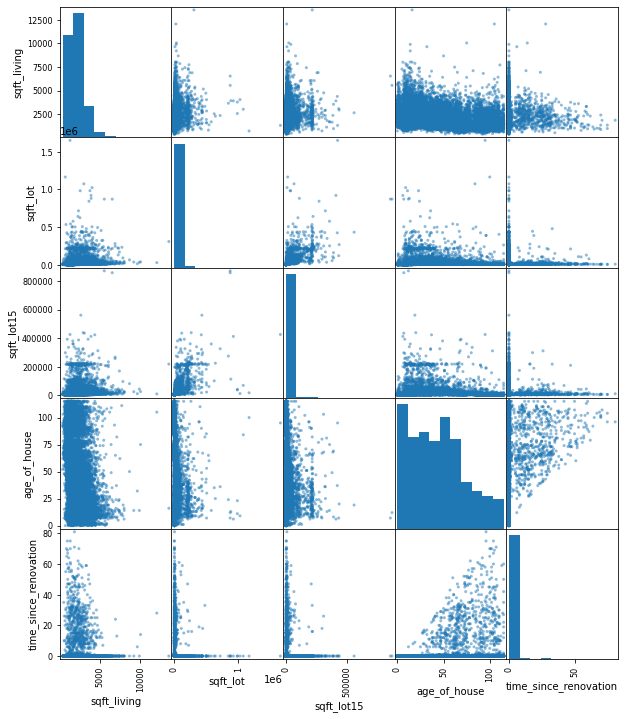

In [337]:
x_columns1=['sqft_living','sqft_lot','sqft_basement','sqft_lot15','age_of_house','time_since_renovation']
pd.plotting.scatter_matrix(x[x_columns1], figsize=(10,12));

Some features are much bigger in magnitude than others. Skewness is also an issue in all our variables too. We will log transform `sqft_living` to reduce the skewnessand perform min_max scaling on all the others except .

In [338]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21597 non-null  float64
 1   bedrooms               21597 non-null  int64  
 2   bathrooms              21597 non-null  float64
 3   sqft_living            21597 non-null  int64  
 4   sqft_lot               21597 non-null  int64  
 5   floors                 21597 non-null  float64
 6   waterfront             21597 non-null  int32  
 7   view                   21597 non-null  float64
 8   condition              21597 non-null  int64  
 9   sqft_basement          21597 non-null  object 
 10  zipcode                21597 non-null  int64  
 11  sqft_lot15             21597 non-null  int64  
 12  age_of_house           21597 non-null  int64  
 13  time_since_renovation  21597 non-null  int32  
dtypes: float64(4), int32(2), int64(7), object(1)
memory us

In [339]:
 
import numpy as np

non_normal =['sqft_living']
for feat in non_normal:
    x[feat] = x[feat].map(lambda x: np.log(x))

#Min-max Scaling on some of the features
sqft_lot = x['sqft_lot']
scaled_sqft_lot= (sqft_lot - min(sqft_lot)) / (max(sqft_lot) - min(sqft_lot))

#Dropping a column with a "?" value
x.drop(x[(x['sqft_basement']=="?")].index,inplace=True)
#Converting the column to a numeric data type 
x['sqft_basement']=pd.to_numeric(x['sqft_basement'])
sqft_basement =x['sqft_basement']
scaled_sqft_basement= (sqft_basement  - min(sqft_basement )) / (max(sqft_basement ) - min(sqft_basement ))


sqft_lot15 = x['sqft_lot15']
scaled_sqft_lot15= (sqft_lot15 - min(sqft_lot15)) / (max(sqft_lot15) - min(sqft_lot15))
time_since_ren = x['time_since_renovation']
scaled_time_since_ren= (time_since_ren  - min(time_since_ren )) / (max(time_since_ren ) - min(time_since_ren ))

#Normalizing age of house
age_of_house=x['age_of_house']
scaled_age_of_house = (age_of_house- np.mean(age_of_house)) / np.sqrt(np.var(age_of_house))

#Adding the scaled dataset
x['sqft_lot']=scaled_sqft_lot
x['sqft_basement']=scaled_sqft_basement
x['sqft_lot15']=scaled_sqft_lot15
x['time_since_renovation']=scaled_time_since_ren
x['age_of_house']=scaled_age_of_house

In [340]:
x.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,zipcode,sqft_lot15,age_of_house,time_since_renovation
0,221900.0,3,1.00,7.073270,0.003108,1.0,0,0.0,3,0.000000,98178,0.005742,0.546471,0.000000
1,538000.0,3,2.25,7.851661,0.004072,2.0,0,0.0,3,0.082988,98125,0.008027,0.682891,0.296296
2,180000.0,2,1.00,6.646391,0.005743,1.0,0,0.0,3,0.000000,98028,0.008513,1.296781,0.000000
3,604000.0,4,3.00,7.580700,0.002714,1.0,0,0.0,5,0.188797,98136,0.004996,0.205422,0.000000
4,510000.0,3,2.00,7.426549,0.004579,1.0,0,0.0,3,0.000000,98074,0.007871,-0.544887,0.000000


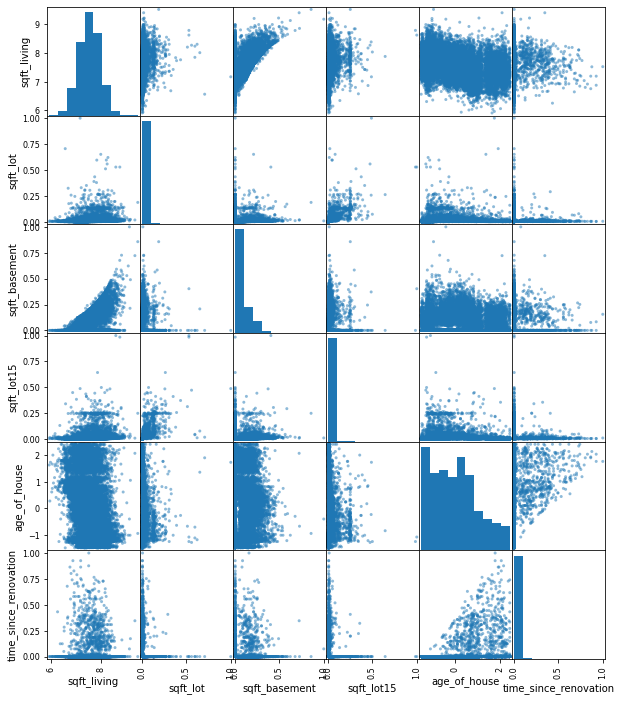

In [341]:

pd.plotting.scatter_matrix(x[x_columns1], figsize=(10,12));

The shape of the bar graphs has not changed but the difference in magnitude can be observed.

### Checking for Categorical variables

In [342]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21143 non-null  float64
 1   bedrooms               21143 non-null  int64  
 2   bathrooms              21143 non-null  float64
 3   sqft_living            21143 non-null  float64
 4   sqft_lot               21143 non-null  float64
 5   floors                 21143 non-null  float64
 6   waterfront             21143 non-null  int32  
 7   view                   21143 non-null  float64
 8   condition              21143 non-null  int64  
 9   sqft_basement          21143 non-null  float64
 10  zipcode                21143 non-null  int64  
 11  sqft_lot15             21143 non-null  float64
 12  age_of_house           21143 non-null  float64
 13  time_since_renovation  21143 non-null  float64
dtypes: float64(10), int32(1), int64(3)
memory usage: 2.3 M

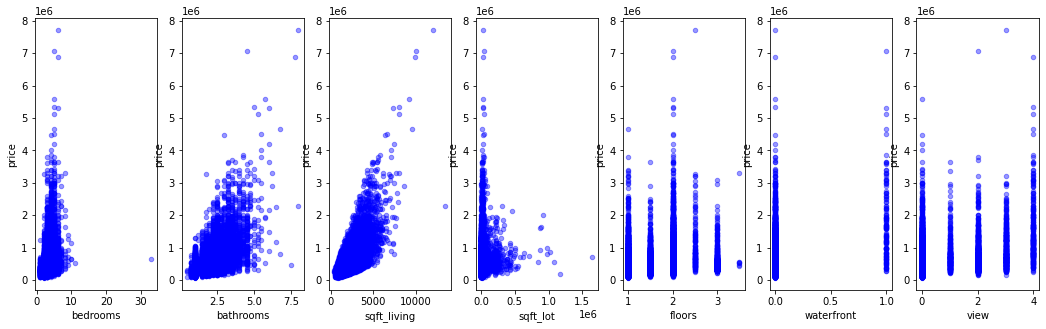

In [343]:
#Creating a scatter plot to identify some categorical variables.

import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(18,5))
for xcol, ax in zip([ 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors','waterfront','view'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

The categorical variables produce vertical lines to show the data is discrete. The most obvious ones are `floors`,`view` and `waterfront`. However, more tests are needes to verify our findings. Checking the number of unique  values in a column as well as the statistics might provide more information.

In [344]:
# Function to check how many unique values are in a column

def check_unique(data,column):
    unique_values=data[column].unique()
    return unique_values
# Function to check the statistics
def print_stats(df,column):
    print('Mean:', df[column].mean())
    print('Median:', df[column].median())
    print('Satandard Deviation:', df[column].std())

In [345]:
#Printing unique values and stats for bedrooms 
unique_values=print(check_unique(x,'bedrooms'))
stats=print_stats(x,'bedrooms')

[ 3  2  4  5  1  6  7  8  9 11 10 33]
Mean: 3.3725582935250435
Median: 3.0
Satandard Deviation: 0.9249165085643833


We could label `bedrooms` as categorical as there are only eleven unique values on the entire column 

In [346]:
#Printing unique values and stats for bathrooms
x['bathrooms']=x['bathrooms'].astype(int)
unique_values=print(check_unique(x,'bathrooms'))
stats=print_stats(x,'bathrooms')

[1 2 3 4 0 5 6 8 7]
Mean: 1.7505084425105235
Median: 2.0
Satandard Deviation: 0.734017807301803


We could also label `bathrooms` as categorical as there are only eight unique values 

In [347]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21143 non-null  float64
 1   bedrooms               21143 non-null  int64  
 2   bathrooms              21143 non-null  int32  
 3   sqft_living            21143 non-null  float64
 4   sqft_lot               21143 non-null  float64
 5   floors                 21143 non-null  float64
 6   waterfront             21143 non-null  int32  
 7   view                   21143 non-null  float64
 8   condition              21143 non-null  int64  
 9   sqft_basement          21143 non-null  float64
 10  zipcode                21143 non-null  int64  
 11  sqft_lot15             21143 non-null  float64
 12  age_of_house           21143 non-null  float64
 13  time_since_renovation  21143 non-null  float64
dtypes: float64(9), int32(2), int64(3)
memory usage: 2.3 MB

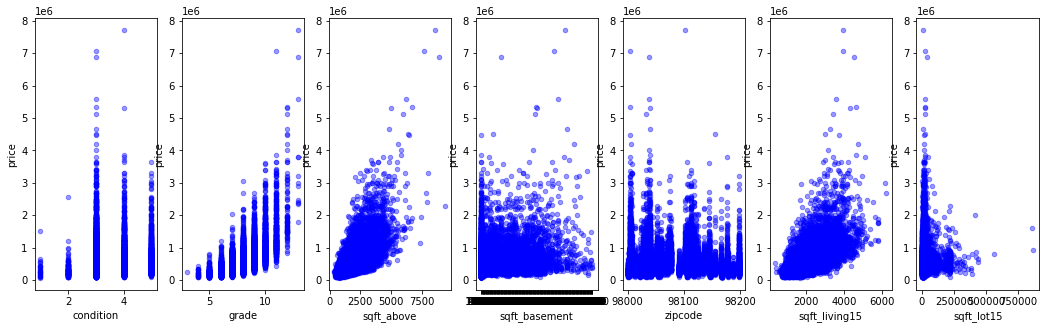

In [348]:
#Using a scatter plot to check for categorical variables 

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(18,5))
for xcol, ax in zip([ 'condition', 'grade', 'sqft_above','sqft_basement','zipcode','sqft_living15','sqft_lot15'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

The categorical variables produce vertical lines to show the data is discrete. The most obvious ones are `condition`, `grade` and `zipcode`. However, more tests are needes to verify our findings. Checking the number of unique  values in a column as well as the statistics might provide more information.

All the categorical variables are `floors`, `waterfront`, `view`, `bedrooms`, `bathrooms`, `condition`, `grade` and `zipcode`.

### Dealing with categorical variables

In [349]:
#Creating the dummy variables 
floors_dummies = pd.get_dummies(x['floors'],prefix='flrs')
water_dummies = pd.get_dummies(x['waterfront'],prefix='waterfrnt')
view_dummies = pd.get_dummies(x['view'],prefix='flrs')
bedrooms_dummies = pd.get_dummies(x['bedrooms'],prefix='bdrms')
bathrooms_dummies = pd.get_dummies(x['bathrooms'],prefix='bthrms')
condition_dummies = pd.get_dummies(x['condition'],prefix='cndtn')
zipcode_dummies = pd.get_dummies(x['zipcode'],prefix='zpcd')

#Dropping the original columns
x_train= x.drop(['floors','waterfront','view','bedrooms','bathrooms','condition','zipcode'], axis=1, inplace=True)
#Joining the dataframes 
x_train = pd.concat([x_train, floors_dummies, water_dummies, view_dummies,bedrooms_dummies,bathrooms_dummies,condition_dummies,zipcode_dummies], axis=1)
x_train.head()



,flrs_1.0,flrs_1.5,flrs_2.0,flrs_2.5,flrs_3.0,flrs_3.5,waterfrnt_0,waterfrnt_1,flrs_0.0,flrs_1.0,...,zpcd_98146,zpcd_98148,zpcd_98155,zpcd_98166,zpcd_98168,zpcd_98177,zpcd_98178,zpcd_98188,zpcd_98198,zpcd_98199
0,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Preparing the the target Variable

From our EDA we know that price follows a Log Normal Distribution and has a skewness of 4.02. We therefore have to normalize it to reduce skewness and also account for outliers by reducing the magnitudes.

#### Normalizing target variable

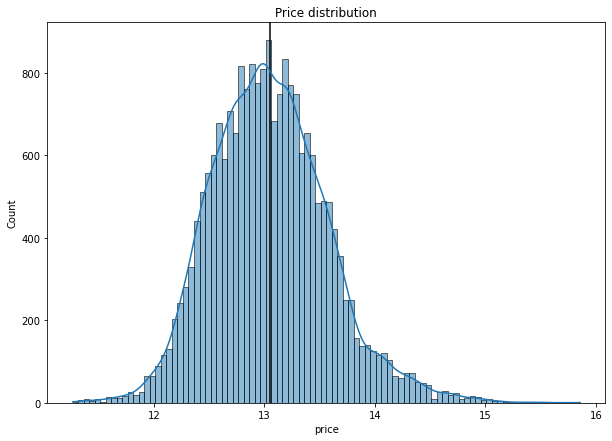

In [350]:
import seaborn as sns

y=x['price']
#Normalizing Y
y=np.log(y)

data=y
mean=data.mean()
fig,ax=plt.subplots(figsize=(10,7))
ax.axvline(mean,color='black')
sns.histplot(data, kde=True)
ax.set_title('Price distribution')
plt.show()

### Splitting the Data

In [351]:
from sklearn.model_selection import train_test_split
x=x.drop('price',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

## Modelling

In [352]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
selector = RFE(model)
linreg = selector.fit(x_train, y_train)
linreg.score(x_test,y_test)

0.44053055402342967

### Model validation using Cross Validation

In [356]:
from sklearn.model_selection import cross_validate
cross_validate(linreg, x, y ,return_train_score=True)

{'fit_time': array([0.21700311, 0.02297926, 0.01199698, 0.01000142, 0.01001048]),
 'score_time': array([0.00699544, 0.00299406, 0.00299692, 0.00299406, 0.00298738]),
 'test_score': array([0.45213656, 0.44406138, 0.43912085, 0.46332809, 0.46964112]),
 'train_score': array([0.45649277, 0.45827566, 0.45940919, 0.45356923, 0.45031734])}